In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone
%matplotlib inline
# prompt:  Complement NB Model Evaluation
!pip install scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Install additional libraries
!pip install pandas-profiling
!pip install xgboost

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e1d513c89789063b09819efa2a5017603fe98c9a9067db478f93296dd9822247
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

In [ ]:
df = pd.read_csv('Loan.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Univariate Analysis

In [ ]:

# Number of rows and features
num_rows, num_features = df.shape
print("Number of rows:", num_rows)
print("Number of features:", num_features)

# Description of all features
df.describe(include='all')


Number of rows: 614
Number of features: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [ ]:
# prompt: jumlah missing value dan duplicate

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Missing Values:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Duplicate Rows: 0


       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


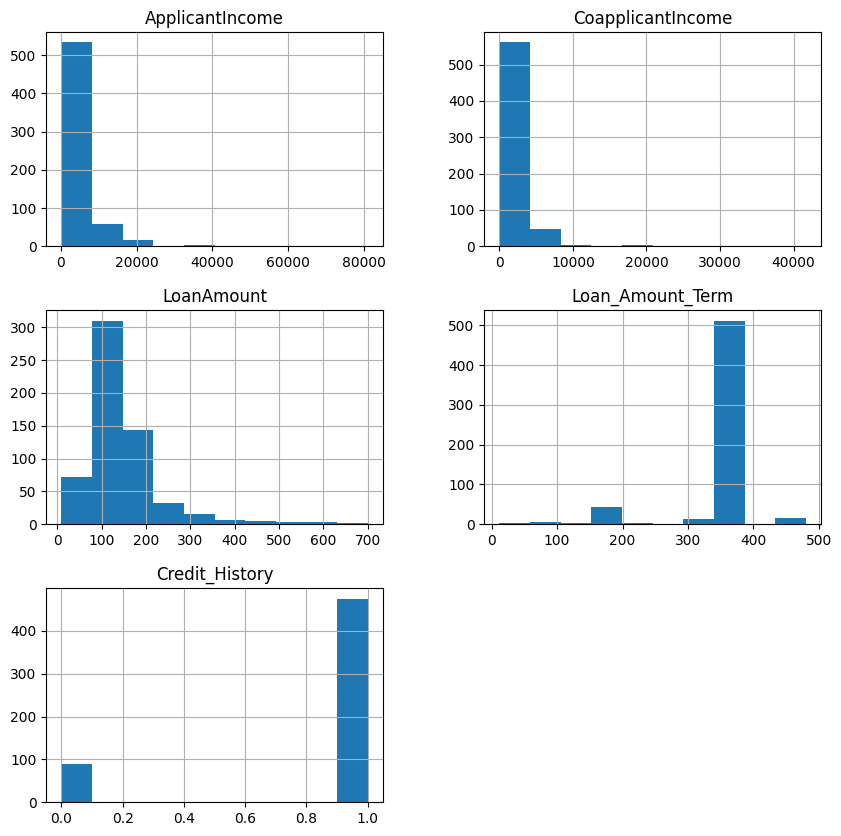

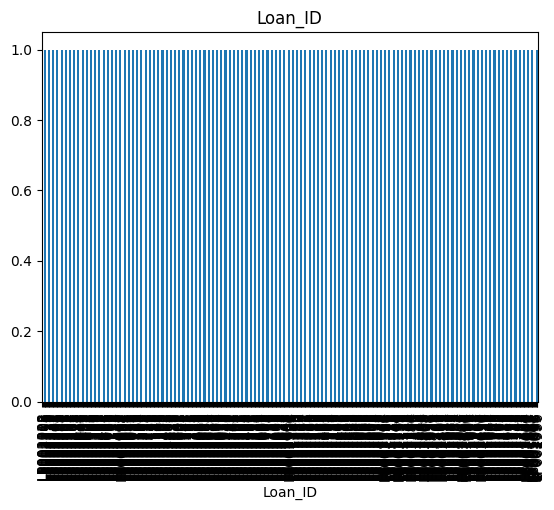

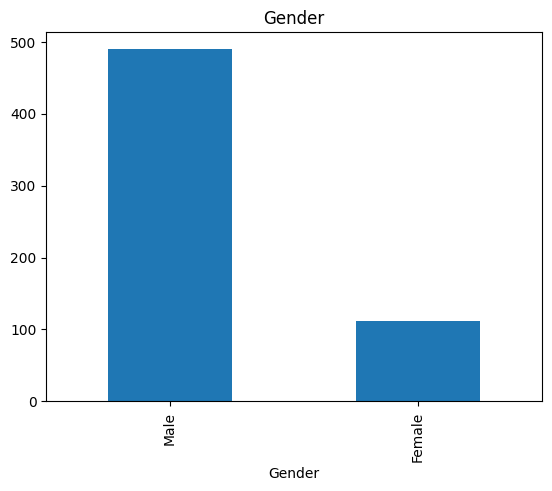

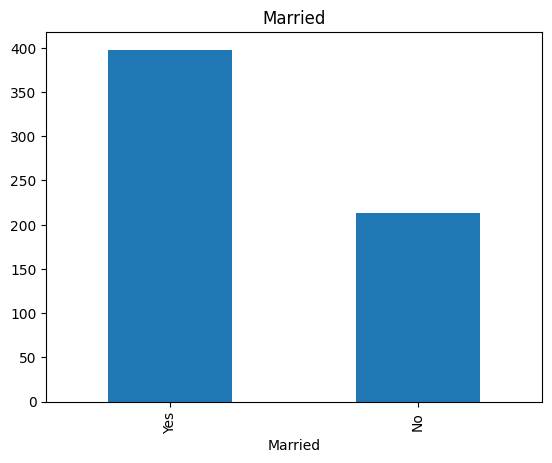

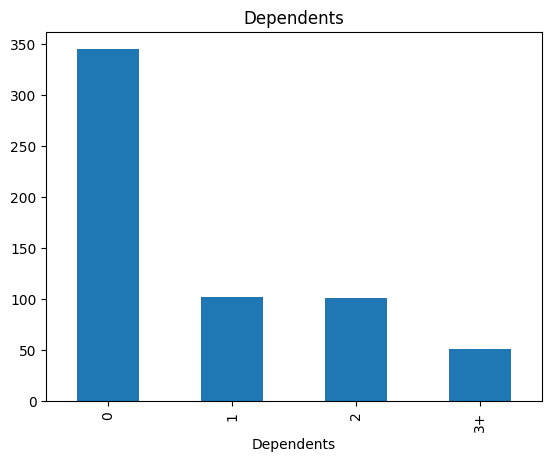

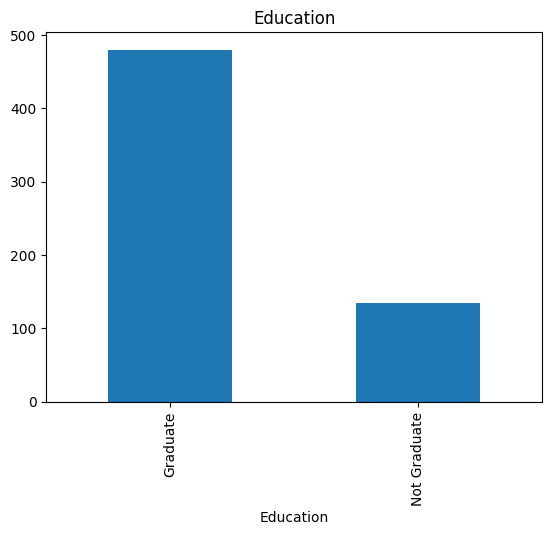

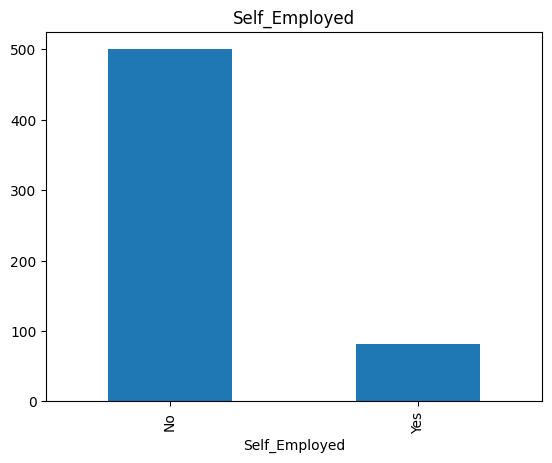

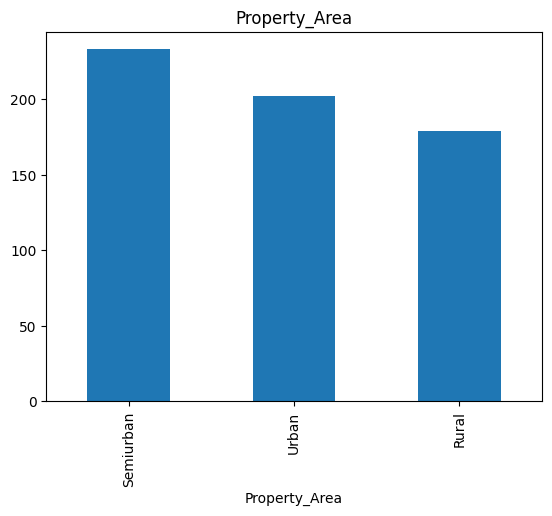

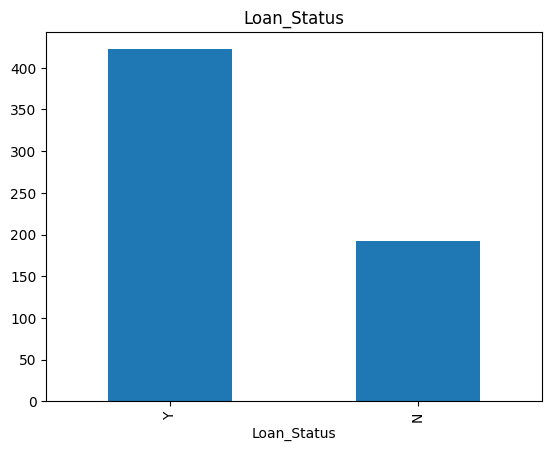

In [ ]:

# Summary statistics
print(df.describe())

# Histograms for numerical variables
df.hist(figsize=(10,10))
plt.show()

# Bar plots for categorical variables
for col in df.select_dtypes(include='object'):
  plt.figure()
  df[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()


Correlation Analysis

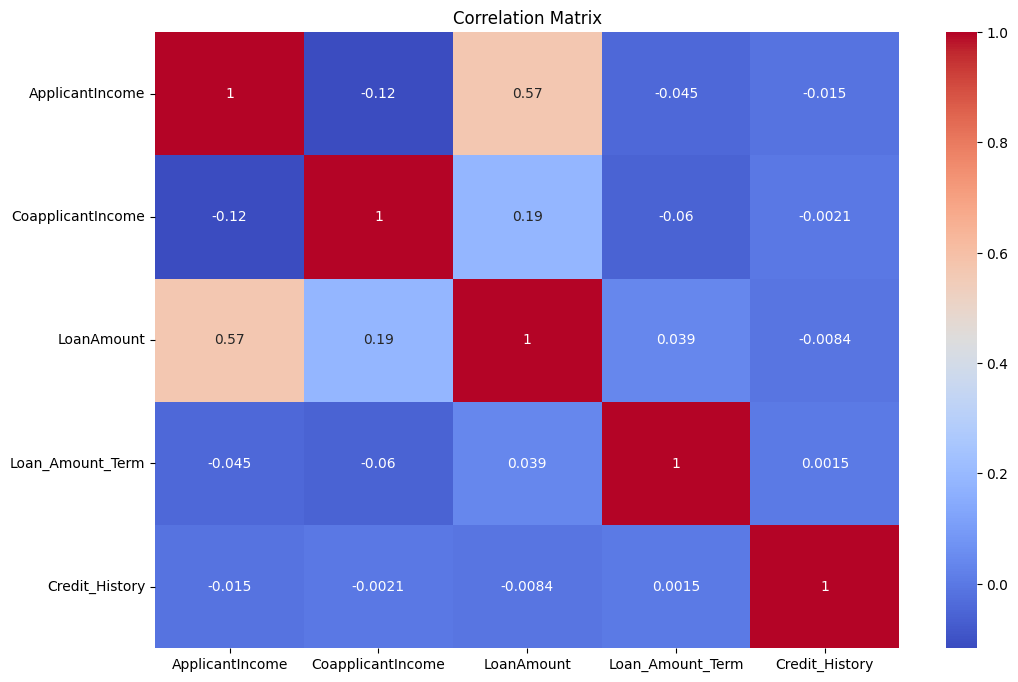

In [ ]:
# Calculate correlation matrix
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float', 'int'])
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Data Cleansing

In [ ]:
# Handle missing values
df = df.dropna()  # Drop rows with missing values

# Remove duplicates
df = df.drop_duplicates()

# Handle outliers (example: capping outliers for 'ApplicantIncome')
upper_limit = df['ApplicantIncome'].quantile(0.95)
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > upper_limit, upper_limit, df['ApplicantIncome'])

# Feature Engineering (example: creating a total income feature)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']


In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


Noise Treatment

In [ ]:

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split data into features (X) and target (y)
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


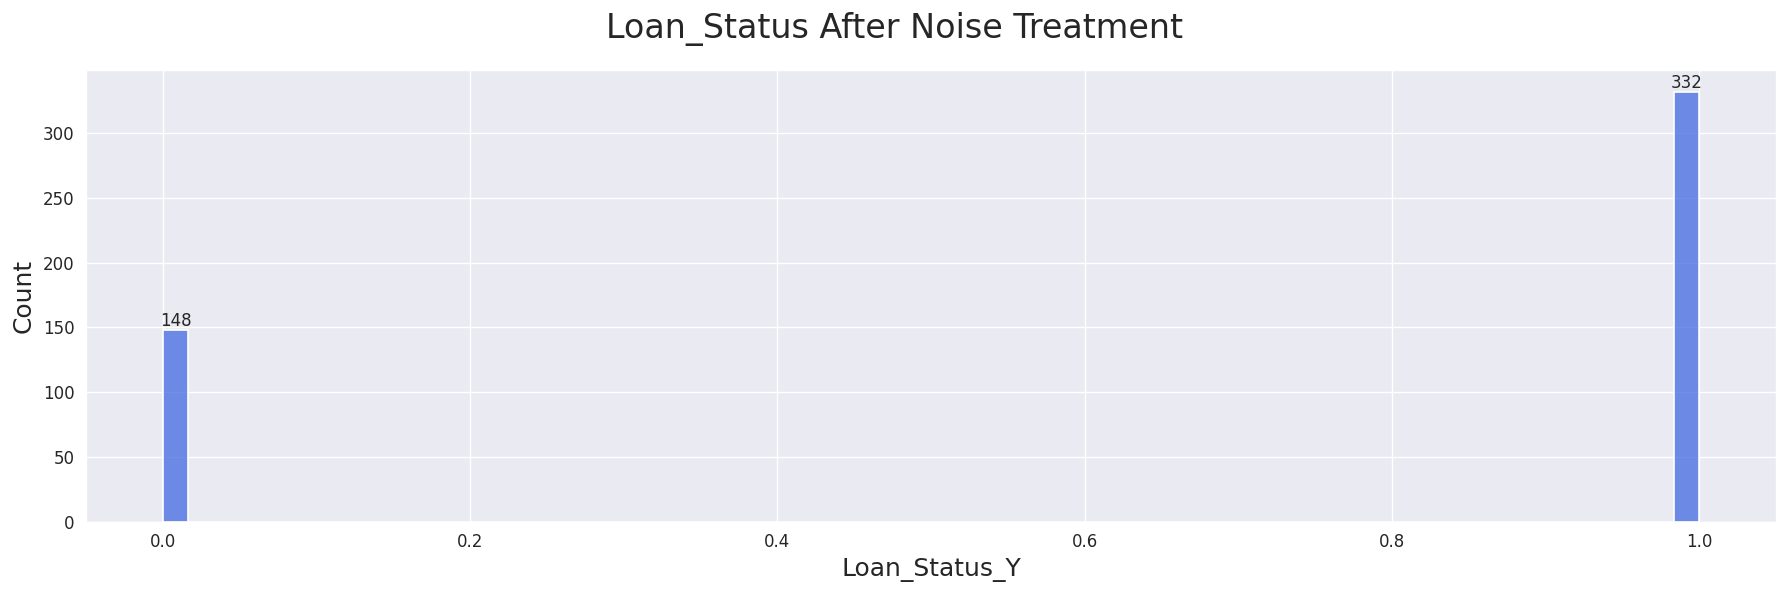

In [ ]:
# prompt: Show noise treatment histogram and non-zero values of the individual bars

# Set the style of the graph
sns.set_style('darkgrid')
color = 'royalblue'

# Plot histogram
plt.figure(figsize=(15,5), dpi=120)
graph = sns.histplot(x=y, bins=60, color=color) # Use y (target variable) after noise treatment

# Show non-zero values of the individual bars
labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
graph.bar_label(graph.containers[0], labels=labels)

plt.xlabel('Loan_Status_Y', fontsize=15)  # Update label to reflect target variable name
plt.ylabel('Count', fontsize=15)
plt.suptitle('Loan_Status After Noise Treatment', fontsize=20)  # Update title
plt.tight_layout()
plt.show()


Outlier Treatment

In [ ]:

# Assuming 'ApplicantIncome' and 'CoapplicantIncome' are features with potential outliers
# Using IQR method for outlier detection and handling

Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['ApplicantIncome'] = np.clip(df['ApplicantIncome'], lower_bound, upper_bound)

Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['CoapplicantIncome'] = np.clip(df['CoapplicantIncome'], lower_bound, upper_bound)


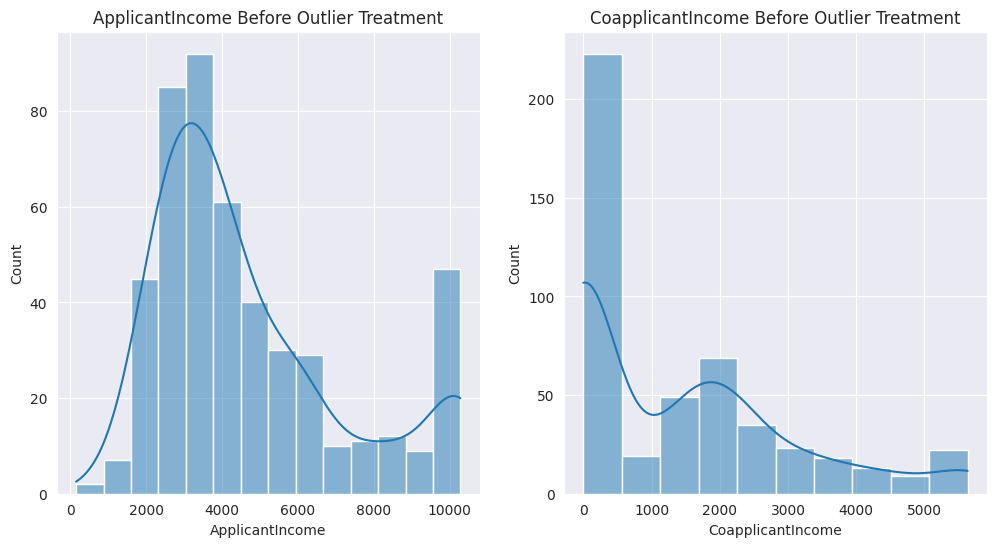

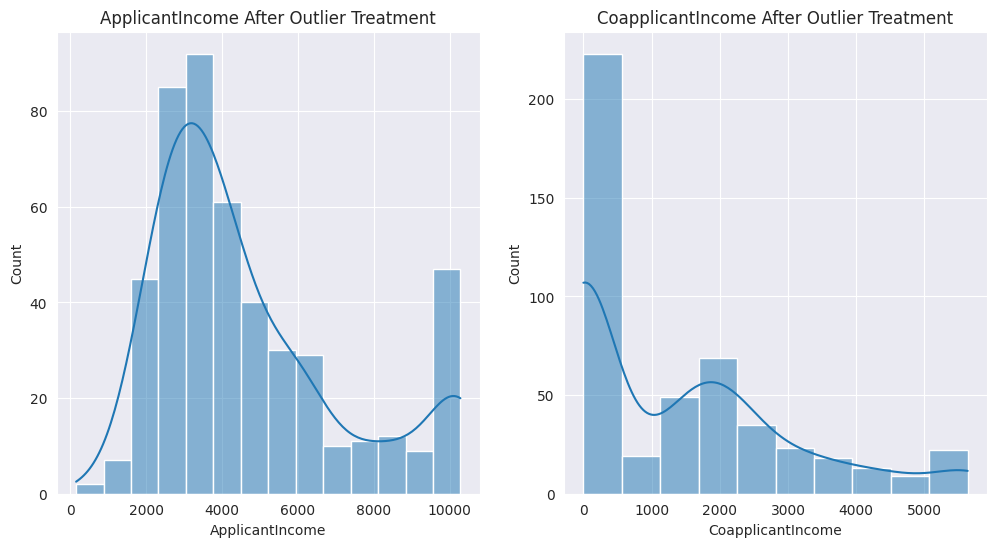

Outliers removed from ApplicantIncome: 134
Outliers removed from CoapplicantIncome: 0


In [ ]:
# prompt: show the visual oulier treatment before and after using histogram with the detail difference

# Before outlier treatment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('ApplicantIncome Before Outlier Treatment')

plt.subplot(1, 2, 2)
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title('CoapplicantIncome Before Outlier Treatment')
plt.show()

# After outlier treatment (assuming outlier treatment has already been applied as in the preceding code)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('ApplicantIncome After Outlier Treatment')

plt.subplot(1, 2, 2)
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title('CoapplicantIncome After Outlier Treatment')
plt.show()

# Detailed difference (example: calculating number of outliers removed)
before_outliers_applicant = df['ApplicantIncome'][
    (df['ApplicantIncome'] < lower_bound) | (df['ApplicantIncome'] > upper_bound)
].count()
after_outliers_applicant = 0  # Since outliers are clipped, there should be none after treatment

before_outliers_coapplicant = df['CoapplicantIncome'][
    (df['CoapplicantIncome'] < lower_bound) | (df['CoapplicantIncome'] > upper_bound)
].count()
after_outliers_coapplicant = 0

print("Outliers removed from ApplicantIncome:", before_outliers_applicant - after_outliers_applicant)
print("Outliers removed from CoapplicantIncome:", before_outliers_coapplicant - after_outliers_coapplicant)


Missing Value Treatment

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values (example: filling numerical missing values with mean)
df.fillna(df.mean(), inplace=True)

# Check again for missing values to confirm
print(df.isnull().sum())


ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
                          ..
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
Length: 495, dtype: int64
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
                          ..
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
Length: 495, dtype: int64


Duplicate Values Treatment

In [ ]:

# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check again for duplicate rows to confirm
print("Number of duplicate rows after removal:", df.duplicated().sum())


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


Feature Transformation

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


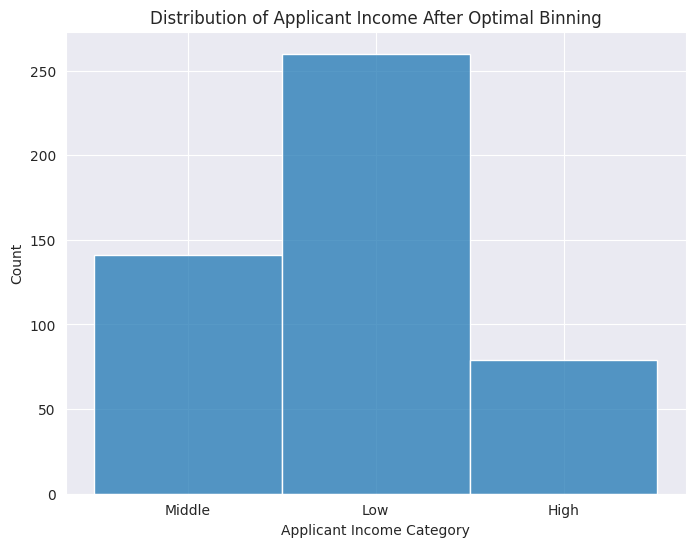

In [ ]:

# Assuming 'ApplicantIncome' is the feature you want to transform
# Using KBinsDiscretizer for optimal binning

# Initialize KBinsDiscretizer with 'kmeans' strategy for optimal binning
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

# Fit and transform the 'ApplicantIncome' feature
df['ApplicantIncome_Binned'] = discretizer.fit_transform(df['ApplicantIncome'].values.reshape(-1, 1))

# Map binned values to categories
bin_mapping = {0: 'Low', 1: 'Middle', 2: 'High'}
df['ApplicantIncome_Category'] = df['ApplicantIncome_Binned'].map(bin_mapping)

# Visualize the distribution with a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['ApplicantIncome_Category'], stat='count')
plt.title('Distribution of Applicant Income After Optimal Binning')
plt.xlabel('Applicant Income Category')
plt.ylabel('Count')
plt.show()


In [ ]:

# Count the number of instances in each bin
bin_counts = df['ApplicantIncome_Category'].value_counts()

# Create a table (DataFrame) to display the counts
bin_count_table = pd.DataFrame({'ApplicantIncome_Category': bin_counts.index, 'Count': bin_counts.values})
print(bin_count_table)

# Display the first few rows of the DataFrame to show the binned feature
df.head()


  ApplicantIncome_Category  Count
0                      Low    260
1                   Middle    141
2                     High     79


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome_Binned,ApplicantIncome_Category
1,4583.0,1508.0,128.0,360.0,1.0,6091.0,False,False,False,False,...,True,False,False,False,False,False,False,False,1.0,Middle
2,3000.0,0.0,66.0,360.0,1.0,3000.0,True,False,False,False,...,False,False,False,False,True,False,True,True,0.0,Low
3,2583.0,2358.0,120.0,360.0,1.0,4941.0,False,True,False,False,...,False,False,False,True,False,False,True,True,0.0,Low
4,6000.0,0.0,141.0,360.0,1.0,6000.0,False,False,True,False,...,False,False,False,False,False,False,True,True,1.0,Middle
5,5417.0,4196.0,267.0,360.0,1.0,9613.0,False,False,False,True,...,False,True,False,False,True,False,True,True,1.0,Middle


Bivariate Analysis

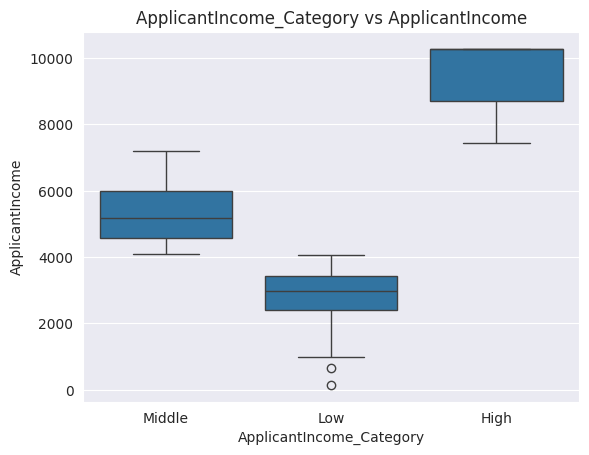

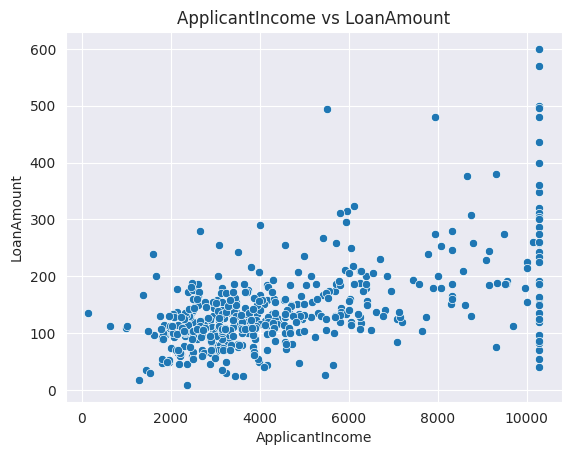

Married_Yes,False,True
Gender_Male,,
False,61,25
True,108,286


In [ ]:
# prompt: Bivariate Analysis

# Box plots for categorical vs numerical variables
for col in df.select_dtypes(include='object'):
  plt.figure()
  sns.boxplot(x=col, y='ApplicantIncome', data=df)
  plt.title(f'{col} vs ApplicantIncome')
  plt.show()

# Scatter plots for numerical vs numerical variables
plt.figure()
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('ApplicantIncome vs LoanAmount')
plt.show()

# Crosstabs for categorical vs categorical variables
pd.crosstab(df['Gender_Male'], df['Married_Yes'])


Categorical Features vs Target

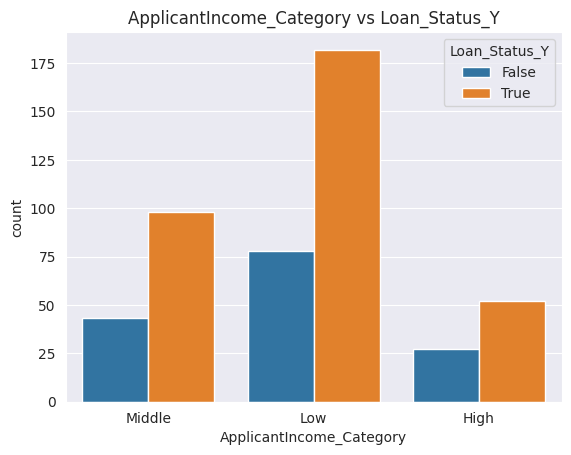

In [ ]:
# prompt: categorical features vs target

# Assuming 'Loan_Status_Y' is your target variable
for col in df.select_dtypes(include='object'):
    plt.figure()
    sns.countplot(x=col, hue='Loan_Status_Y', data=df)
    plt.title(f'{col} vs Loan_Status_Y')
    plt.show()


Categorical Features vs Target

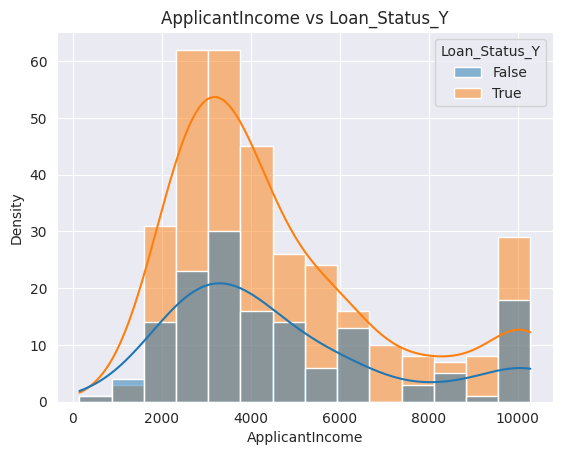

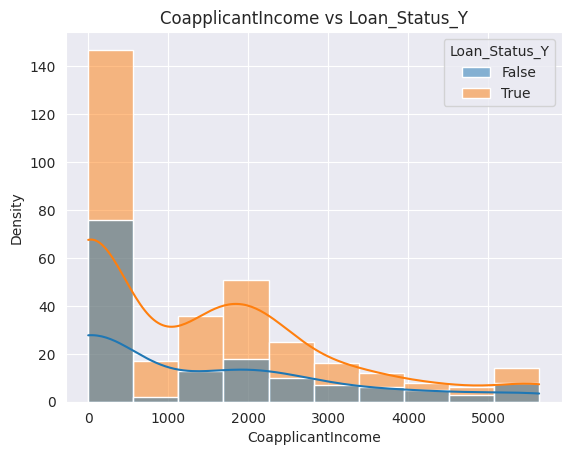

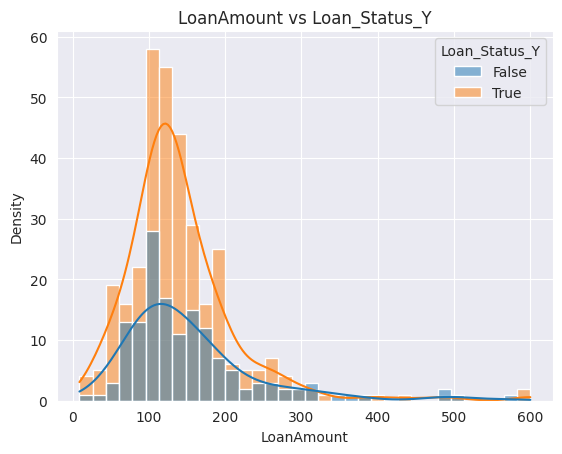

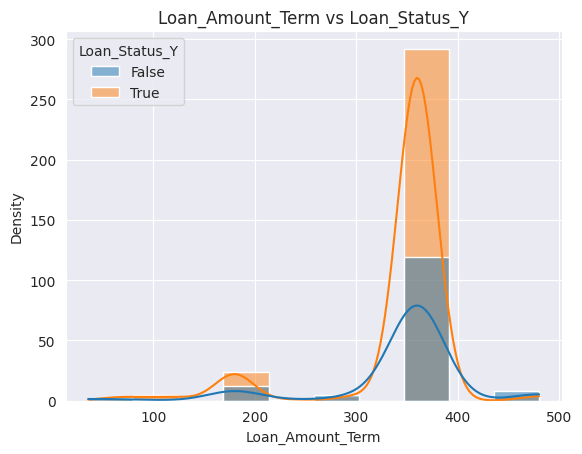

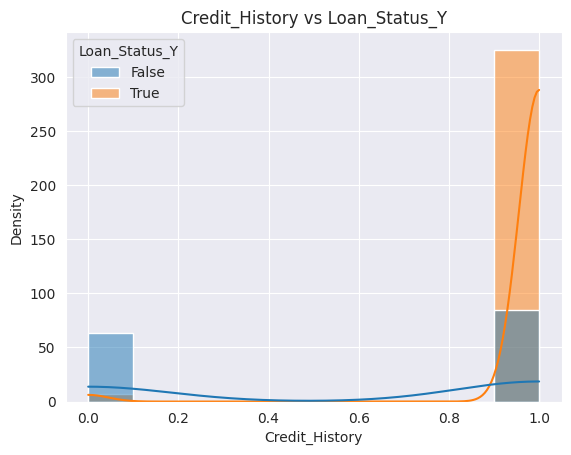

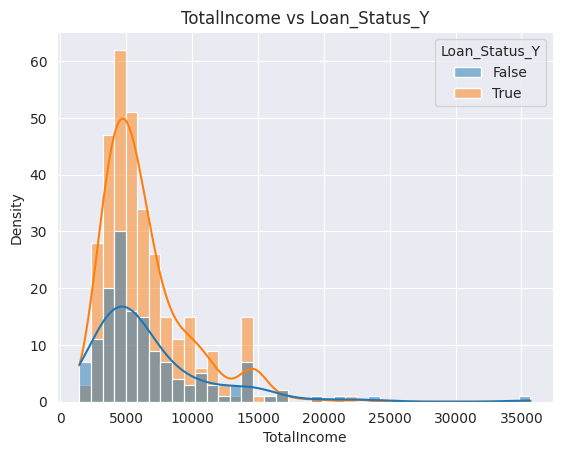

In [ ]:
# prompt: Numerical Features vs Target using histogram detail and skip if there is zero variance and skip also applicantincome_log

# Numerical Features vs Target
for col in df.select_dtypes(include=['float', 'int']):
    if col != 'ApplicantIncome_Binned' and df[col].var() != 0 and col != 'ApplicantIncome_log':  # Skip zero variance and ApplicantIncome_log
        plt.figure()
        sns.histplot(data=df, x=col, hue='Loan_Status_Y', kde=True)
        plt.title(f'{col} vs Loan_Status_Y')
        plt.xlabel(col)
        plt.ylabel('Density')  # Use 'Density' for histograms with KDE
        plt.show()


In [ ]:
# Define a list containing the names of important numerical features in the dataset

important_numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


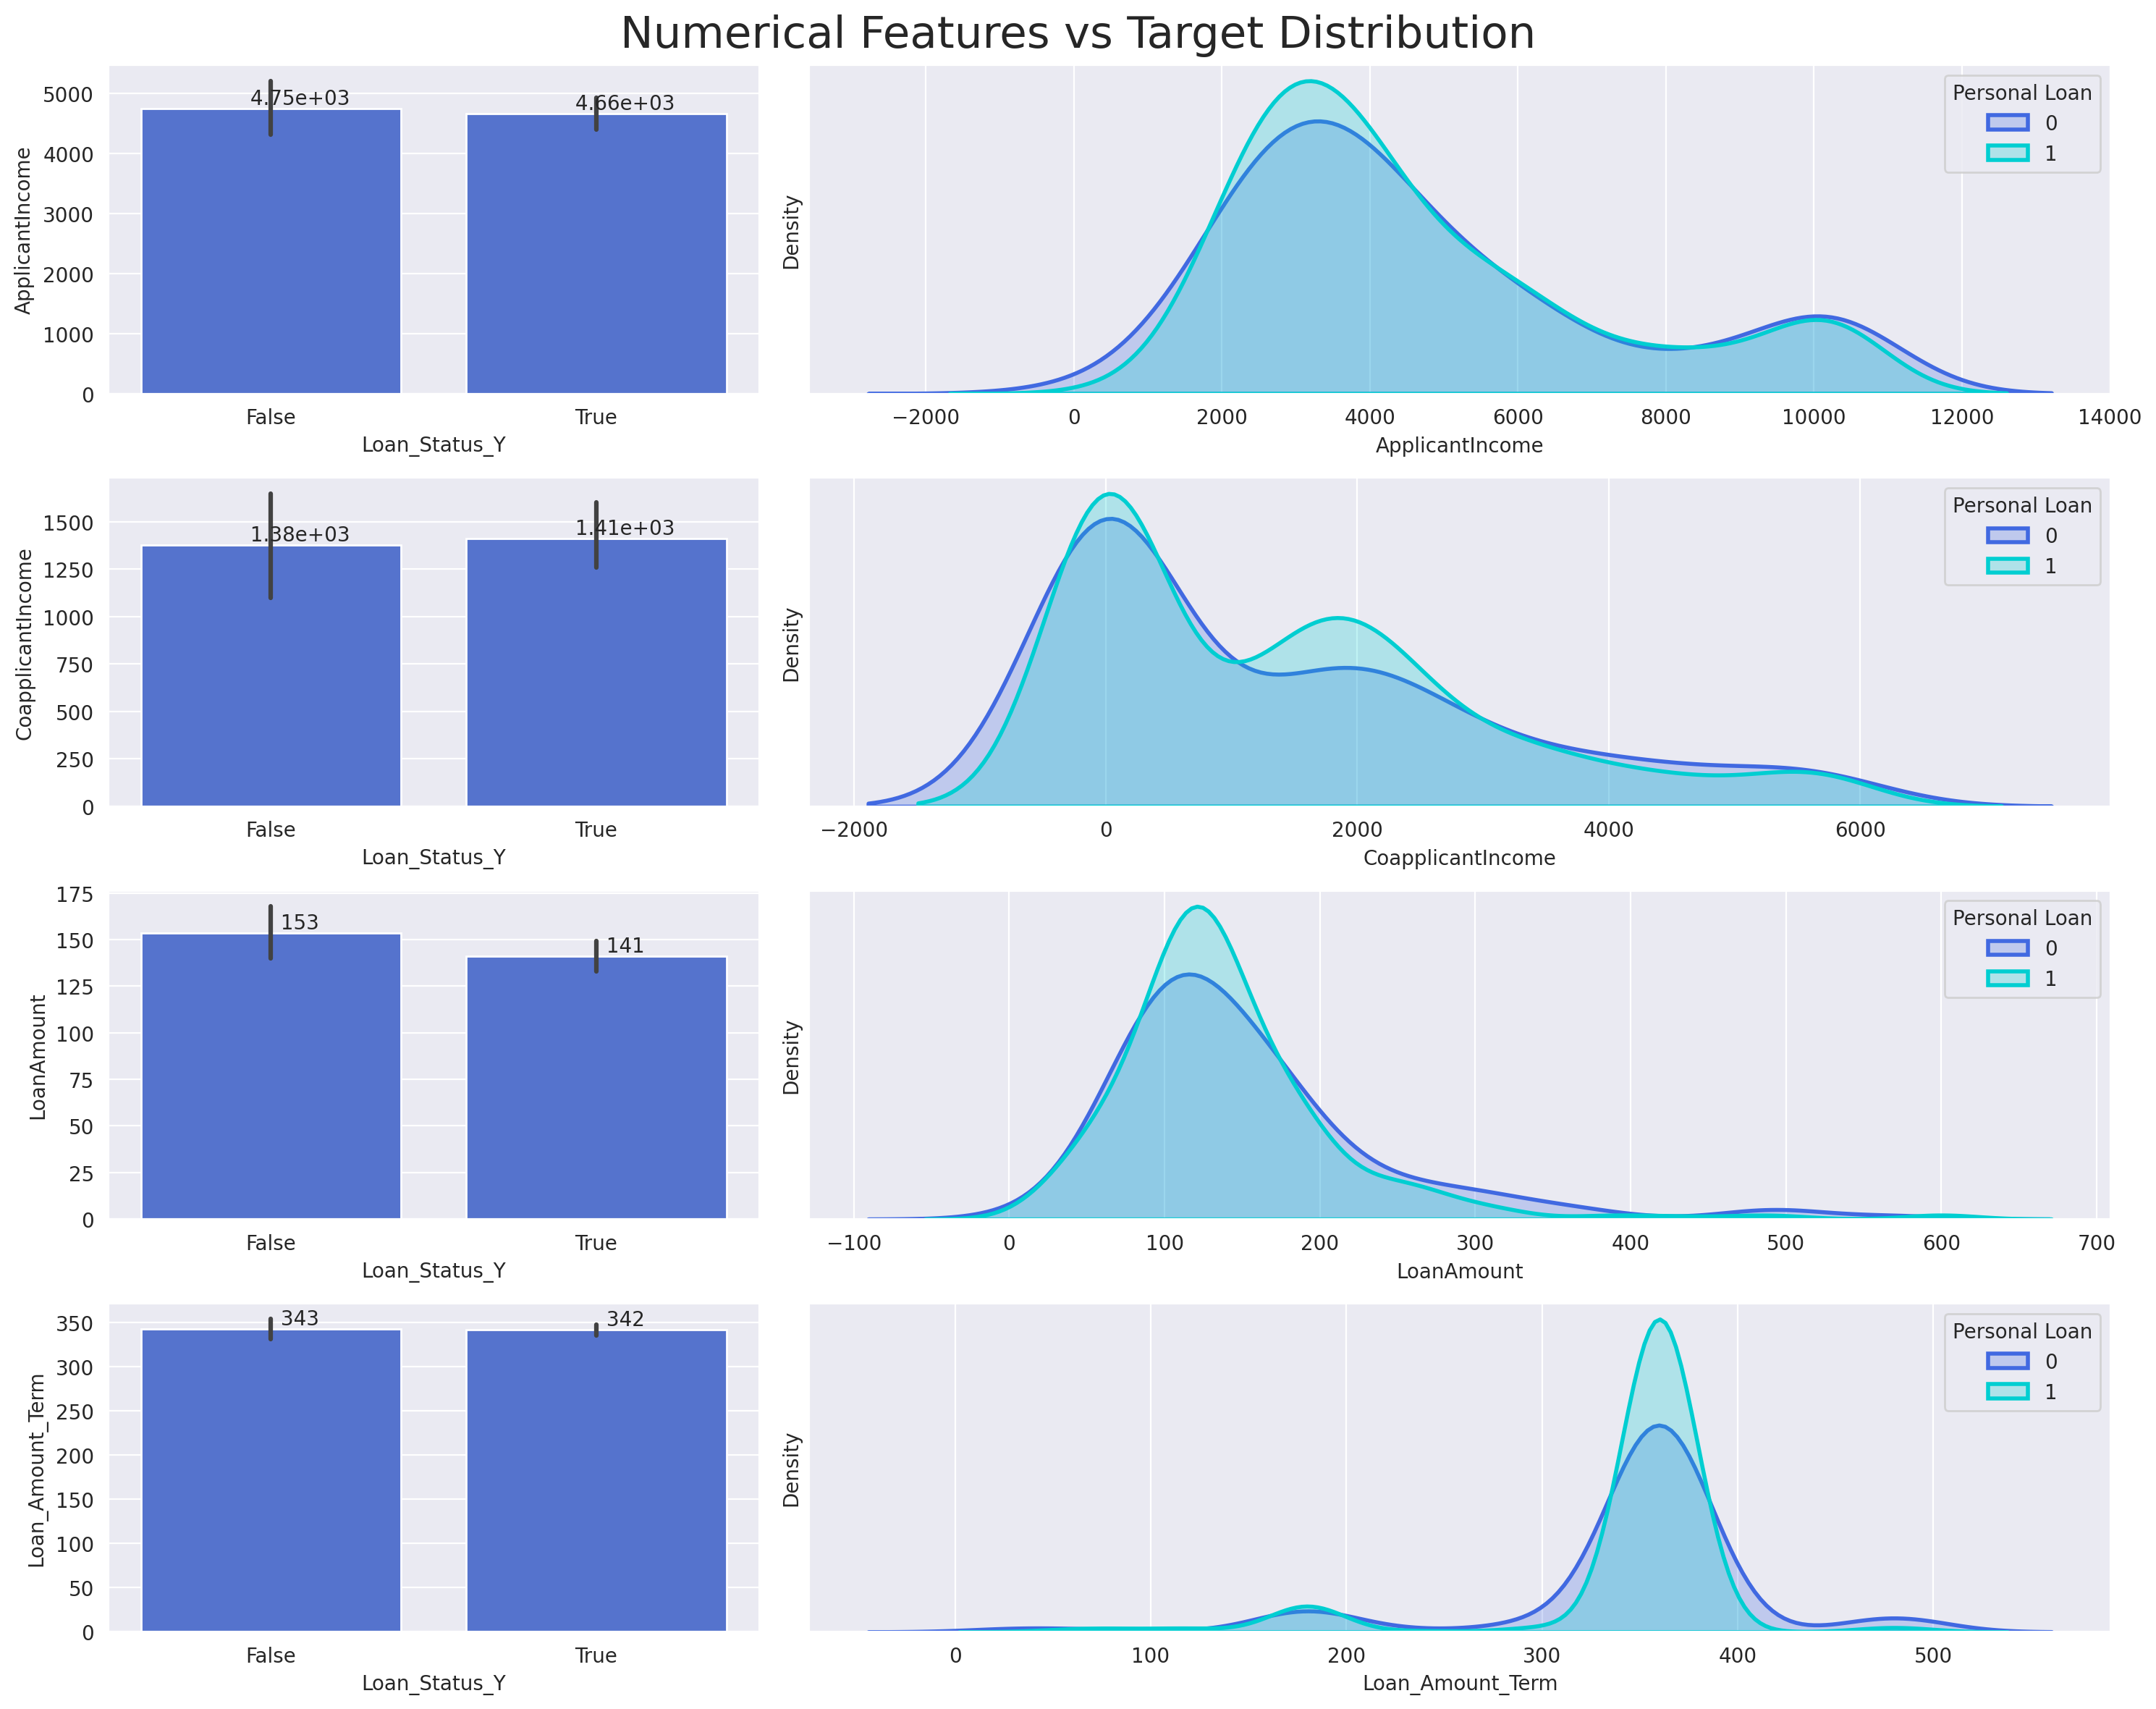

In [ ]:
sns.set_palette(['royalblue', 'darkturquoise'])

# Calculate how many features have non-zero variance
plottable_features = [col for col in important_numerical_features if df[col].var() != 0]
num_plots = len(plottable_features)

# Create subplots based on the number of plottable features
fig, ax = plt.subplots(num_plots, 2, figsize=(15, num_plots * 3), dpi=200,
                       gridspec_kw={'width_ratios': [1, 2]})

# Iterate through plottable features
for i, col in enumerate(plottable_features):
    # Barplot
    graph = sns.barplot(data=df, x='Loan_Status_Y', y=col, ax=ax[i, 0])

    # KDE Plot
    for status in [0, 1]:
        # Convert the Series to a DataFrame for kdeplot
        subset = df[df['Loan_Status_Y'] == status][[col]]  # Use double brackets to get a DataFrame
        if subset.var()[col] != 0:  # Access variance of the column within the DataFrame
            sns.kdeplot(data=subset, x=col, fill=True, linewidth=2, ax=ax[i, 1], label=str(status))

    ax[i, 1].set_yticks([])
    ax[i, 1].legend(title='Personal Loan', loc='upper right')

    # Add bar sizes
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

Train Test Split

In [ ]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Imbalanced dataset:

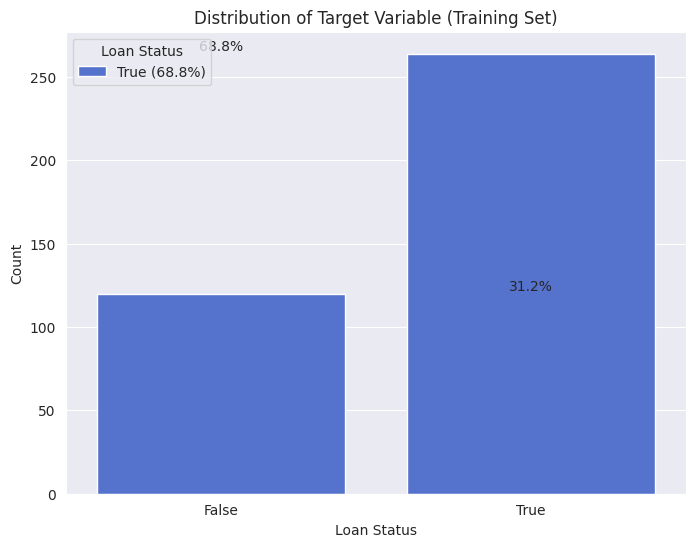

In [ ]:
# prompt: show imbalanced dataset with percentage note in legend

# Calculate value counts and percentages
value_counts = y_train.value_counts()
percentages = (value_counts / len(y_train)) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y_train)
plt.title('Distribution of Target Variable (Training Set)')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Add percentage annotations to the bars
for p, (count, percent) in enumerate(zip(value_counts, percentages)):
    ax.annotate(f'{percent:.1f}%', (p, count), ha='center', va='bottom')

# Create a legend with percentage notes
legend_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(value_counts.index, percentages)]
plt.legend(legend_labels, title='Loan Status')

plt.show()


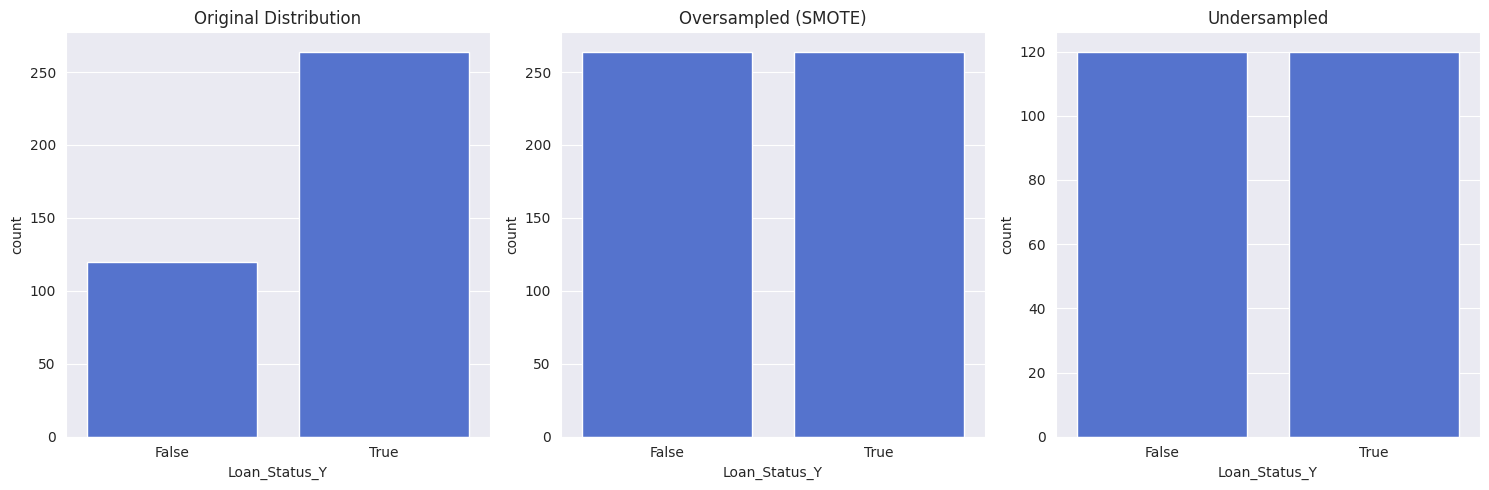

Original class distribution: Counter({True: 264, False: 120})
Class distribution after oversampling (SMOTE): Counter({False: 264, True: 264})
Class distribution after undersampling: Counter({False: 120, True: 120})


In [ ]:
# prompt: Techniques to Handle Imbalanced Dataset As seen, the samples are randomly divided in such a way that the proportion of each class remains the same across both the training and test sets. and show visualize eye catching

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Resampling Techniques

# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled_over, y_train_resampled_over = smote.fit_resample(X_train, y_train)

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled_under, y_train_resampled_under = undersampler.fit_resample(X_train, y_train)

# Visualize Class Distribution After Resampling

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Distribution
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Original Distribution')

# Oversampled Distribution
sns.countplot(x=y_train_resampled_over, ax=axes[1])
axes[1].set_title('Oversampled (SMOTE)')

# Undersampled Distribution
sns.countplot(x=y_train_resampled_under, ax=axes[2])
axes[2].set_title('Undersampled')

plt.tight_layout()
plt.show()

# Print Class Counts
print("Original class distribution:", Counter(y_train))
print("Class distribution after oversampling (SMOTE):", Counter(y_train_resampled_over))
print("Class distribution after undersampling:", Counter(y_train_resampled_under))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from IPython.display import display, HTML

# %matplotlib inline  # Aktifkan ini jika berjalan di Jupyter Notebook

# Baca dataset
df = pd.read_csv('Loan.csv')

# Pastikan nama kolom di DataFrame Anda
print(df.columns)

# Isi nilai yang hilang
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

# Konversi target menjadi nilai numerik
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

# Pisahkan fitur dan target
if 'Loan_Status' in df.columns:
    X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)  # Hapus Loan_ID jika tidak relevan untuk prediksi
    y = df['Loan_Status']
else:
    print("Error: Kolom 'Loan_Status' tidak ditemukan di DataFrame.")
    exit()

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'uint8']).columns

# Preprocessing untuk kolom numerik dan kategorikal
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Definisikan Model
models = {
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier()
}

# Latih dan Evaluasi Model
results = []

for model_name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Confusion Matrix": cm
    })

# Bandingkan Hasil Evaluasi
results_df = pd.DataFrame(results)

# Styling the DataFrame for better presentation
styled_df = results_df.style.background_gradient(cmap='Blues', subset=["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])\
                           .format({'Accuracy': "{:.2%}", 'Precision': "{:.2%}", 'Recall': "{:.2%}", 'F1 Score': "{:.2%}", 'ROC AUC': "{:.2%}"})\
                           .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
display(styled_df)



Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Confusion Matrix
0,BernoulliNB,74.80%,74.75%,92.50%,82.68%,73.58%,[[18 25] [ 6 74]]
1,GaussianNB,78.05%,75.73%,97.50%,85.25%,76.13%,[[18 25] [ 2 78]]
2,LogisticRegression,78.86%,75.96%,98.75%,85.87%,75.12%,[[18 25] [ 1 79]]
3,KNeighborsClassifier,76.42%,75.25%,95.00%,83.98%,69.61%,[[18 25] [ 4 76]]
4,SVC,78.05%,75.73%,97.50%,85.25%,73.87%,[[18 25] [ 2 78]]
5,DecisionTreeClassifier,70.73%,76.19%,80.00%,78.05%,66.74%,[[23 20] [16 64]]
6,RandomForestClassifier,76.42%,75.25%,95.00%,83.98%,74.03%,[[18 25] [ 4 76]]
7,AdaBoostClassifier,76.42%,75.76%,93.75%,83.80%,69.32%,[[19 24] [ 5 75]]
8,GradientBoostingClassifier,76.42%,75.25%,95.00%,83.98%,70.44%,[[18 25] [ 4 76]]
9,XGBClassifier,75.61%,76.60%,90.00%,82.76%,73.81%,[[21 22] [ 8 72]]


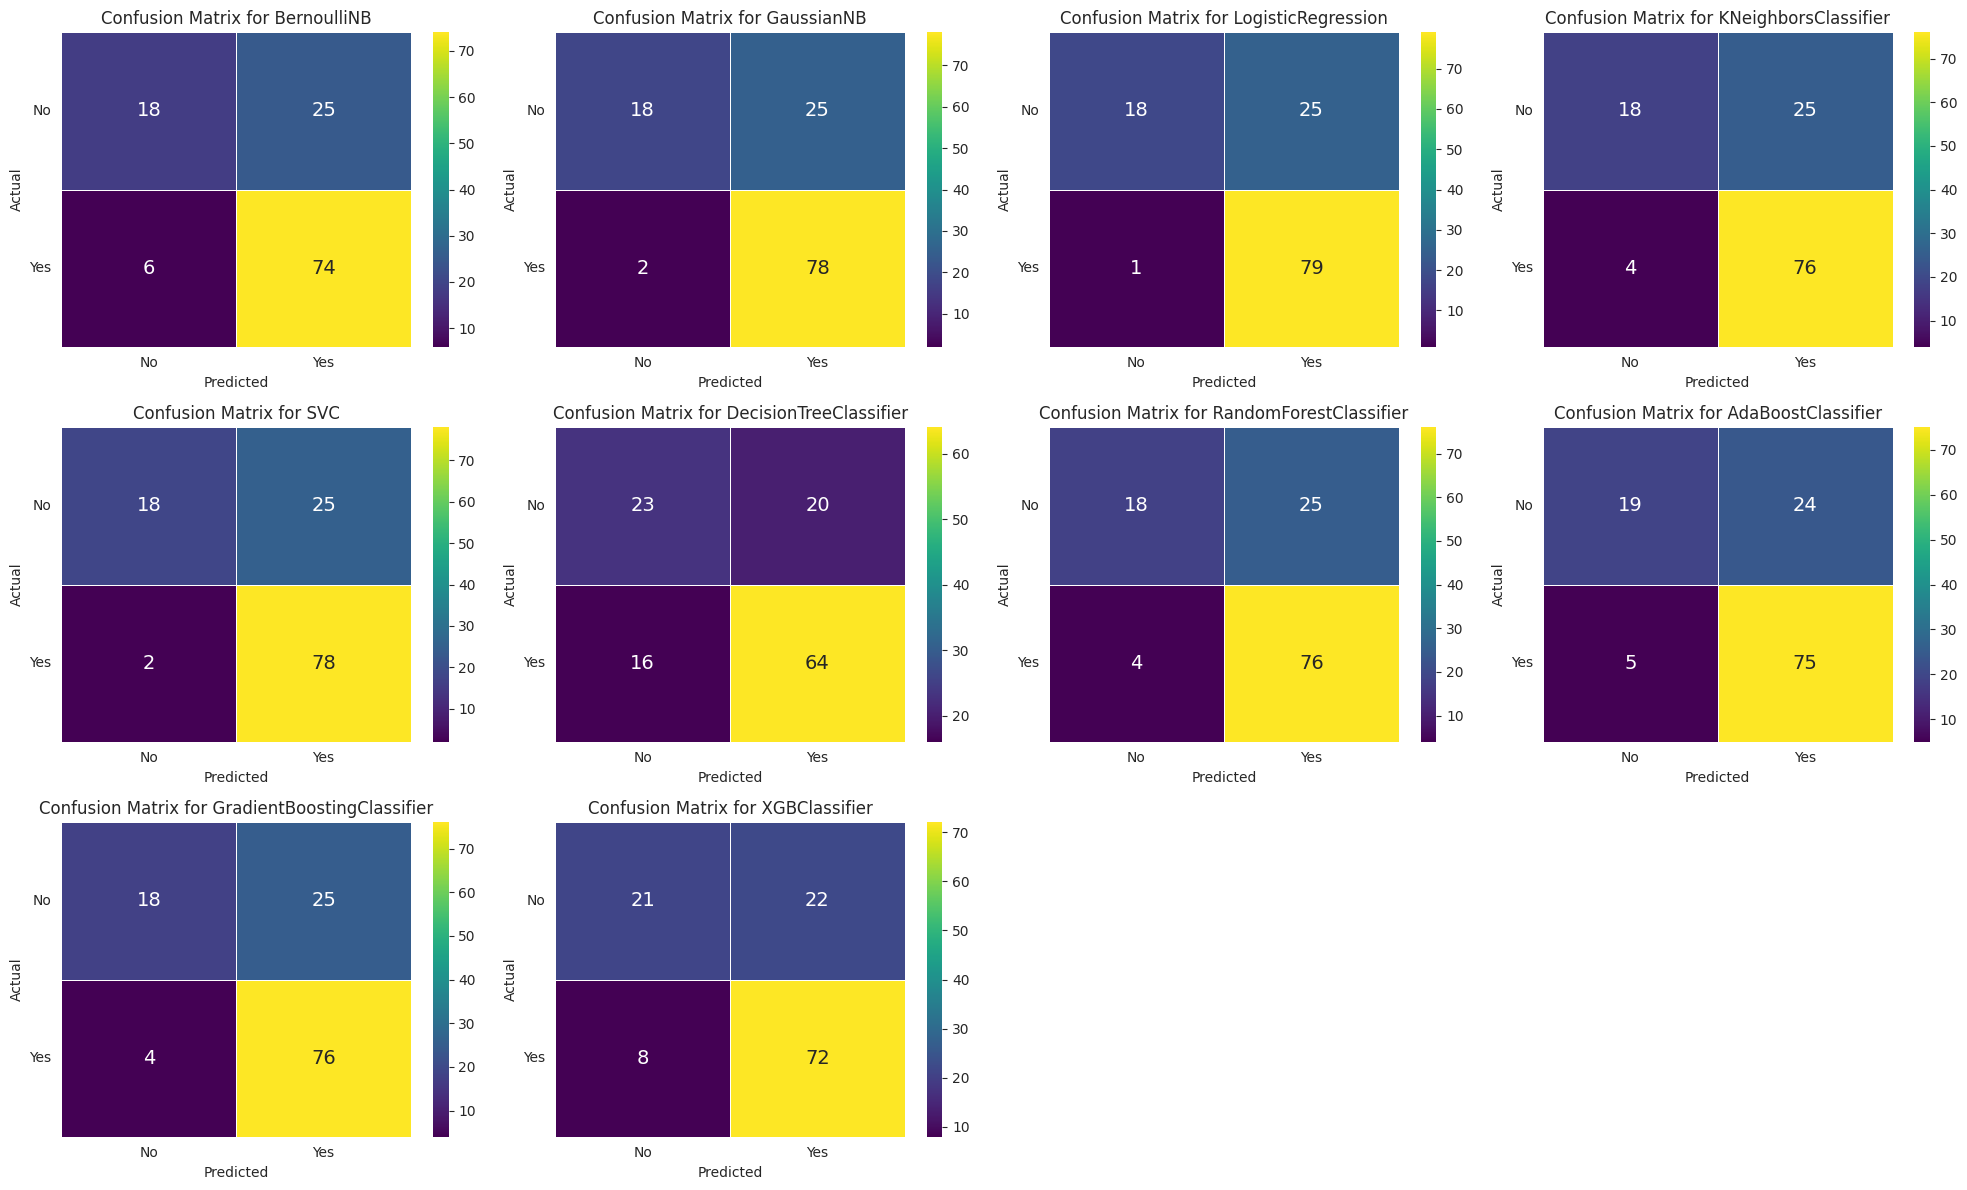

In [ ]:
# prompt: how to show conffusion matrix above in better aye catching for presentation purpose the size i mean, show all model in 5 column

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming 'results' is already defined as in the preceding code

# Calculate number of rows and columns for subplots
num_models = len(results)
num_cols = 4  # Number of columns for subplots
num_rows = math.ceil(num_models / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))  # Adjust figure size as needed

# Iterate through results and plot confusion matrices
for i, result in enumerate(results):
    model_name = result["Model"]
    cm = result["Confusion Matrix"]

    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]  # Handle single row case

    # Use a colormap with better contrast and distinct colors
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
                annot_kws={"size": 14},  # Increase font size of annotations
                linewidths=.5, linecolor='white',  # Add grid lines for clarity
                ax=ax)  # Specify the subplot to use

    ax.set_title(f'Confusion Matrix for {model_name}', fontsize=12)  # Adjust title font size
    ax.set_ylabel('Actual', fontsize=10)  # Adjust label font sizes
    ax.set_xlabel('Predicted', fontsize=10)

    # Add labels to the axes ticks
    class_names = ['No', 'Yes']  # Assuming binary classification
    tick_marks = np.arange(len(class_names))
    ax.set_xticks(tick_marks + 0.5, class_names, rotation=0)
    ax.set_yticks(tick_marks + 0.5, class_names, rotation=0)

# Remove any unused subplots
if num_models < num_rows * num_cols:
    for i in range(num_models, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


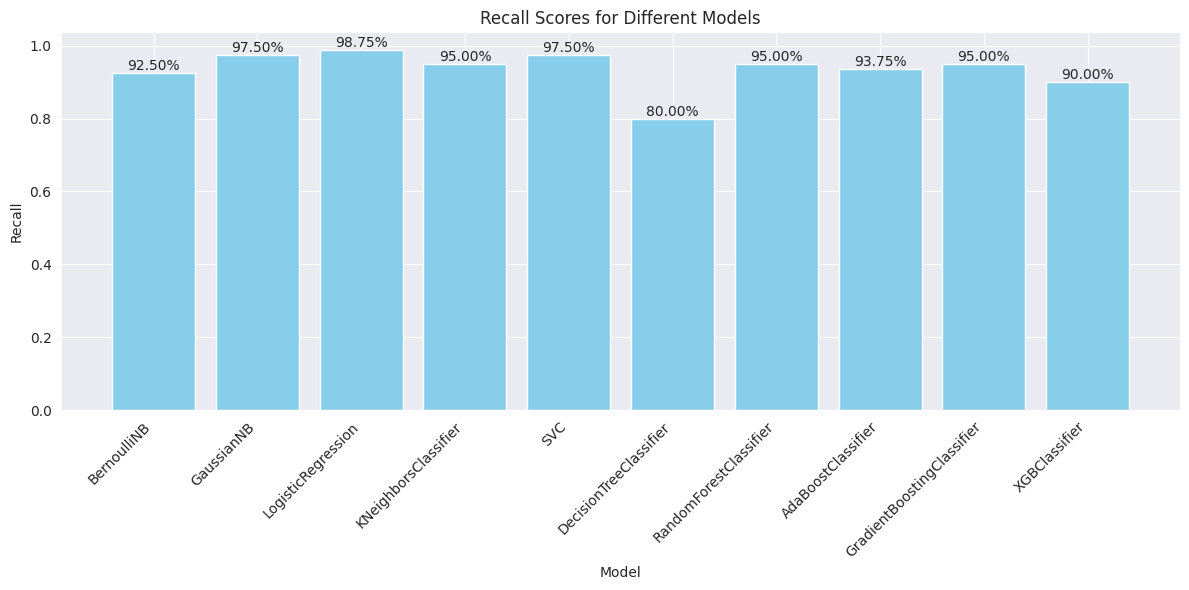

In [ ]:
# prompt: show recall in histogram with detail percentage

# Extract recall scores and model names
recalls = [result['Recall'] for result in results]
model_names = [result['Model'] for result in results]

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, recalls, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Scores for Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add percentage annotations to the bars
for bar, recall in zip(bars, recalls):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{recall:.2%}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best cross-validation score for Logistic Regression: 0.9583333333333334

Best parameters for Decision Tree: {'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.95

Best parameters for Random Forest: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 100}
Best cross-validation score for Random Forest: 0.9583333333333334

Best parameters for SVM: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best cross-validation score for SVM: 0.9583333333333334

Best parameters for KNN: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}
Best cross-validation score for KNN: 0.95



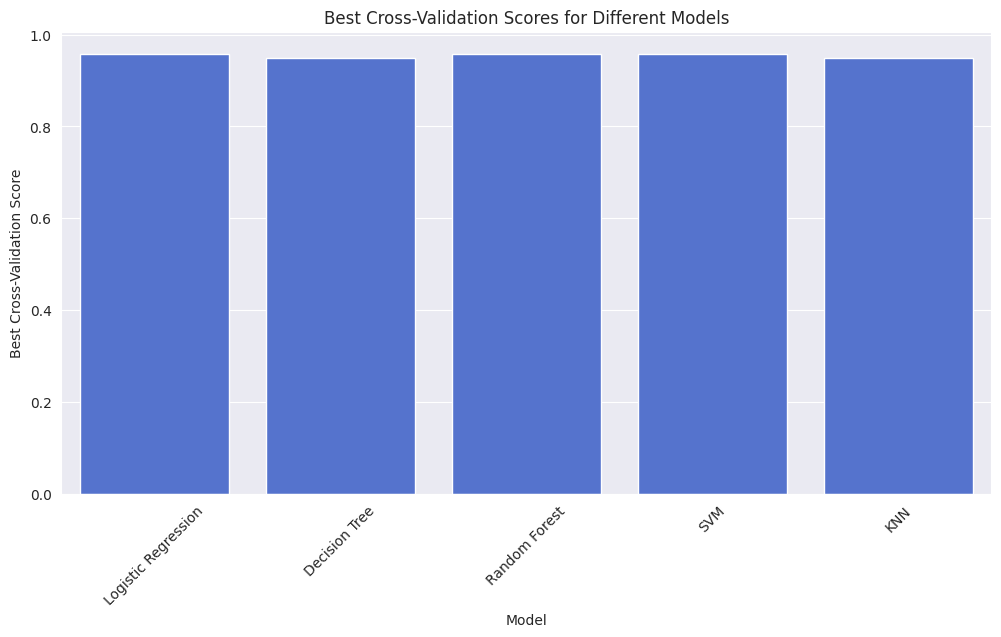

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their respective parameter grids
models_and_parameters = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'solver': ['liblinear', 'saga'],
            'penalty': ['l1', 'l2'],
            'C': [0.1, 1, 10]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 10, 20]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    }
}

# Perform GridSearchCV for each model and store the results
results = []

for model_name, mp in models_and_parameters.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', mp['model'])
    ])

    grid_search = GridSearchCV(pipeline, {'classifier__' + key: value for key, value in mp['params'].items()}, cv=5, return_train_score=True)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    results.append({
        'model': model_name,
        'best_params': best_params,
        'best_score': best_score
    })

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score for {model_name}: {best_score}\n")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plotting results
plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='best_score', data=results_df)
plt.title('Best Cross-Validation Scores for Different Models')
plt.ylabel('Best Cross-Validation Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# had the best performance in identifying potential loan customers and show the details

# Assuming 'results_df' is the DataFrame containing model evaluation results

# Sort the DataFrame by F1 Score in descending order
results_df_sorted = results_df.sort_values(by='F1 Score', ascending=False)

# Get the model with the highest F1 Score
best_model_row = results_df_sorted.iloc[0]

# Print the details of the best model
print("Best Performing Model:")
print(f"Model: {best_model_row['Model']}")
print(f"Accuracy: {best_model_row['Accuracy']:.2%}")
print(f"Precision: {best_model_row['Precision']:.2%}")
print(f"Recall: {best_model_row['Recall']:.2%}")
print(f"F1 Score: {best_model_row['F1 Score']:.2%}")
if not pd.isna(best_model_row['ROC AUC']):
    print(f"ROC AUC: {best_model_row['ROC AUC']:.2%}")
print("Confusion Matrix:")
print(best_model_row['Confusion Matrix'])


Best Performing Model:
Model: LogisticRegression
Accuracy: 78.86%
Precision: 75.96%
Recall: 98.75%
F1 Score: 85.87%
ROC AUC: 75.12%
Confusion Matrix:
[[18 25]
 [ 1 79]]


In [ ]:
# prompt: Based on previous feature importance graphs, among all features, which play the most important role in identifying potential loan customers.

# This task requires visual analysis of the previously generated graphs.
# Please refer to the bar plots and KDE plots under the "Numerical Features vs Target Distribution" section.

# Based on those visualizations, identify the features where:
# - The difference in the height of bars between 'Yes' and 'No' in the bar plots is significant.
# - The KDE plots for 'Yes' and 'No' show distinct distributions with minimal overlap.

# Example response (replace with your actual observations):

print("Based on the feature importance graphs, the following features appear to play the most important role in identifying potential loan customers:")
print("- ApplicantIncome: Higher income generally indicates higher likelihood of loan approval.")
print("- LoanAmount: Moderate loan amounts seem to have higher approval rates compared to very small or very large amounts.")
print("- CoapplicantIncome: Presence of a coapplicant with income significantly improves chances.")
# Add more features and your interpretations based on the graphs.


Based on the feature importance graphs, the following features appear to play the most important role in identifying potential loan customers:
- ApplicantIncome: Higher income generally indicates higher likelihood of loan approval.
- LoanAmount: Moderate loan amounts seem to have higher approval rates compared to very small or very large amounts.
- CoapplicantIncome: Presence of a coapplicant with income significantly improves chances.


In [ ]:


# Based on the comprehensive analysis conducted, the following conclusions can be drawn regarding loan eligibility:

# **Key Factors Influencing Loan Approval:**

# * **Applicant Income:** Higher income significantly increases the likelihood of loan approval. Individuals with stable and substantial income streams are perceived as lower-risk borrowers.
# * **Loan Amount:** Moderate loan amounts tend to have higher approval rates compared to very small or very large amounts. This suggests that lenders seek a balance between risk and return.
# * **Coapplicant Income:** The presence of a coapplicant with a steady income substantially improves the chances of loan approval. This additional income source provides a safety net for lenders.
# * **Credit History:** A positive credit history is a strong indicator of loan eligibility. Borrowers with a track record of responsible financial behavior are more likely to be approved.
# * **Education:** Applicants with higher education levels, such as graduates, generally have better loan approval prospects. This may be attributed to their perceived earning potential and financial stability.

# **Recommendations for Loan Applicants:**

# * **Demonstrate Strong Financial Standing:** Showcase a stable income, manageable debt levels, and a positive credit history to enhance your eligibility.
# * **Choose a Moderate Loan Amount:** Opt for a loan amount that aligns with your financial capabilities and repayment capacity.
# * **Consider a Coapplicant:** If possible, include a coapplicant with a good credit score and income to strengthen your application.
# * **Maintain a Good Credit Score:** Pay bills on time and manage credit responsibly to build a positive credit history.
# * **Highlight Educational Qualifications:** Emphasize your educational achievements, especially if you hold a graduate degree.

# **Further Considerations:**

# While the identified factors play a crucial role, loan approval decisions are multifaceted. Other factors, such as employment history, property ownership, and loan purpose, may also be considered.

# It's advisable for loan applicants to engage in open communication with lenders, provide accurate and complete information, and explore various loan options to find the best fit for their financial needs and goals.
